In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [0]:
df = pd.read_csv("GOG.csv",index_col="DateTime")

In [6]:
df.drop("Adj Close",axis=1,inplace=True)
df.head()

,open,high,low,close,volume,close_sma,bb,rsi
DateTime,,,,,,,,
12-08-2010,242.212219,247.622620,241.496490,246.251251,4404700,0.961991,0.132604,32.085521
13-08-2010,244.744751,245.840836,243.248245,243.418411,3865500,0.961991,0.132604,32.085521
16-08-2010,242.082077,245.180176,240.490494,243.038040,2607300,0.961991,0.132604,32.085521
17-08-2010,244.509506,247.597595,243.258255,245.505508,3777600,0.961991,0.132604,32.085521
18-08-2010,245.465469,245.680679,241.016022,241.316315,5367400,0.961991,0.132604,32.085521


In [0]:
pca = PCA(n_components=8).fit(df)

[9.99999984e-01 1.62206877e-08 2.17240596e-11 2.25605515e-12
 1.16683279e-12 3.19328172e-13 2.82699334e-16 3.73914535e-17]


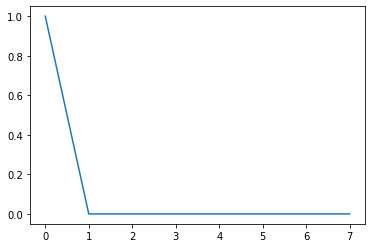

In [10]:
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)

In [0]:
df["close1"] = 0
df["close2"] = 0
df["close3"] = 0
df["close4"] = 0
df["close5"] = 0
df["close6"] = 0
df["close7"] = 0 
df["close8"] = 0
df["close9"] = 0

In [0]:
js = df.drop(["open","high","low","volume","close_sma","bb","rsi"],axis=1)

In [0]:
js["future_close"] = js.close.shift(-1)

In [0]:
js["close1"] = js["close"].shift(1)
js["close2"] = js["close"].shift(2)
js["close3"] = js["close"].shift(3)
js["close4"] = js["close"].shift(4)
js["close5"] = js["close"].shift(5)
js["close6"] = js["close"].shift(6)
js["close7"] = js["close"].shift(7)
js["close8"] = js["close"].shift(8)
js["close9"] = js["close"].shift(9)
js["close10"] = js["close"].shift(10)

In [0]:
js = js[["close10","close9","close8","close7","close6","close5","close4","close3","close2","close1","close","future_close"]]

In [0]:
js = js[11:-25]

In [0]:
X = js.drop("future_close",axis=1)
y = js["future_close"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [0]:
y_train = y_train.values.reshape(y_train.shape[0],1)
y_test = y_test.values.reshape(y_test.shape[0],1)

In [0]:
scalerX = StandardScaler().fit(X_train)
scalerY = StandardScaler().fit(y_train)

In [0]:
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)
y_train_scaled = scalerY.transform(y_train)
y_test_scaled = scalerY.transform(y_test)

In [138]:
svr = SVR()
#svr.fit(X_train_scaled, y_train_scaled)
svr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [139]:
svr.score(X_train, y_train)
#svr.score(X_train_scaled, y_train_scaled)

0.003705304985418323

In [140]:
svr.score(X_test,y_test)

-0.006553137952276967

In [0]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [0]:
y_pred_train = svr.predict(X_train_scaled)
y_pred_test = svr.predict(X_test_scaled)

In [0]:
ytr_pred = scalerY.inverse_transform(y_pred_train)
yt_pred = scalerY.inverse_transform(y_pred_test)

In [129]:
mean_squared_error(y_train,ytr_pred)

96.98557910448608

In [130]:
y_train

array([[305.085083],
       [407.762756],
       [316.771759],
       ...,
       [261.026031],
       [556.809998],
       [791.340027]])

In [131]:
ytr_pred

array([297.76616615, 413.11178135, 309.43402523, ..., 275.45125676,
       552.05882919, 761.19349764])

In [137]:
X_train_scaled[0]

array([-1.02204735, -1.02305425, -1.0216818 , -1.01041255, -1.06216254,
       -1.06121546, -1.0685538 , -1.06639674, -1.05947377, -1.09290974,
       -1.09344344])

In [0]:
def trader(X):
  initial_cash = 1000000
  nStocks = 100
  for i in range(X.shape[0]):
    y_pred = svr.predict(X)
    


